# Import Dependencies

In [1]:
import warnings
warnings.simplefilter('ignore')
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("../Data/trial1.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,AIRLINE,AIRLINE_P,DEST_AIRPORT,DEST_AIRPORT_P,Delays,YEAR,MONTH,Flight_Status
0,EV,5,MEM,69,98.0,2017,4,Delayed
1,EV,5,GPT,40,68.0,2017,4,Delayed
2,EV,5,SAT,98,92.0,2017,4,Delayed
3,EV,5,GPT,40,53.0,2017,4,Delayed
4,NK,8,TPA,112,93.0,2017,4,Delayed


In [107]:
df1 = df.drop(['AIRLINE', 'DEST_AIRPORT'], axis=1)
df1.head()

,AIRLINE_P,DEST_AIRPORT_P,Delays,YEAR,MONTH,Flight_Status
0,5,69,98.0,2017,4,Delayed
1,5,40,68.0,2017,4,Delayed
2,5,98,92.0,2017,4,Delayed
3,5,40,53.0,2017,4,Delayed
4,8,112,93.0,2017,4,Delayed


# Select features (columns)

In [108]:
X = df1.iloc[:, :-1]  #independent columns
y = df1['Flight_Status'].values    #target column i.e price range
print(X.shape, y.shape)

(88399, 5) (88399,)


In [109]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical
label_encoder = LabelEncoder()
label_encoder.fit(y.reshape(-1,1))
encoded_y = label_encoder.transform(y)


# # Step 2: Convert encoded labels to one-hot-encoding
# y_categorical = to_categorical(encoded_y)

print(encoded_y, y)

[0 0 0 ... 0 0 1] ['Delayed' 'Delayed' 'Delayed' ... 'Delayed' 'Delayed' 'Normal']


# Create a Train Test Split

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,encoded_y,random_state=42,stratify=y)

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [111]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train the model

k: 1, Train/Test Score: 0.994/0.891
k: 3, Train/Test Score: 0.944/0.910
k: 5, Train/Test Score: 0.935/0.916
k: 7, Train/Test Score: 0.932/0.918
k: 9, Train/Test Score: 0.930/0.921
k: 11, Train/Test Score: 0.928/0.921
k: 13, Train/Test Score: 0.927/0.920
k: 15, Train/Test Score: 0.926/0.921
k: 17, Train/Test Score: 0.926/0.921
k: 19, Train/Test Score: 0.926/0.922
k: 21, Train/Test Score: 0.925/0.922
k: 23, Train/Test Score: 0.925/0.922
k: 25, Train/Test Score: 0.925/0.923
k: 27, Train/Test Score: 0.925/0.923
k: 29, Train/Test Score: 0.925/0.923
k: 31, Train/Test Score: 0.925/0.924
k: 33, Train/Test Score: 0.925/0.923
k: 35, Train/Test Score: 0.925/0.923
k: 37, Train/Test Score: 0.925/0.923
k: 39, Train/Test Score: 0.924/0.923
k: 41, Train/Test Score: 0.924/0.924
k: 43, Train/Test Score: 0.924/0.923
k: 45, Train/Test Score: 0.924/0.924
k: 47, Train/Test Score: 0.924/0.924
k: 49, Train/Test Score: 0.924/0.924
k: 51, Train/Test Score: 0.924/0.924
k: 53, Train/Test Score: 0.924/0.924
k: 55,

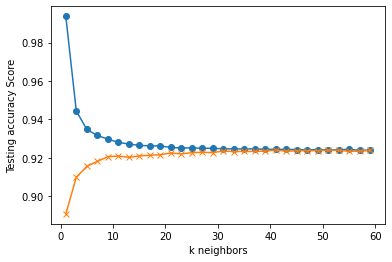

In [112]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 60, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 60, 2), train_scores, marker='o')
plt.plot(range(1, 60, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [113]:
model = KNeighborsClassifier(n_neighbors=41)

In [114]:
model.fit(X_train_scaled, y_train)
print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_test, y_test)}")

Training Data Score: 0.7080800615393897
Testing Data Score: 0.7080542986425339


In [115]:
predictions = model.predict(X_test)

In [116]:
print(f"First 10 Predictions:   {predictions[:10].tolist()}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
First 10 Actual labels: [0, 0, 0, 1, 1, 0, 1, 0, 1, 1]


In [117]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                target_names=df1['Flight_Status'].unique()))

              precision    recall  f1-score   support

     Delayed       0.71      1.00      0.83     15648
      Normal       0.00      0.00      0.00      6452

    accuracy                           0.71     22100
   macro avg       0.35      0.50      0.41     22100
weighted avg       0.50      0.71      0.59     22100



# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [118]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors': [ 1,3,5,7,9,11,13,15,17,19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53,55,57,59],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']}
grid = GridSearchCV(model, param_grid, verbose=3, cv=3, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   40.5s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   58.9s finished


In [119]:
print("Best params :", grid.best_params_)
print("Best score: ", grid.best_score_)

Best params : {'metric': 'euclidean', 'n_neighbors': 55, 'weights': 'uniform'}
Best score:  0.9224573472575113


In [120]:
# Make predictions with the hypertuned model
predictions = grid_result1.predict(X_test)
print(classification_report(y_test, predictions,
                target_names=df1['Flight_Status'].unique()))

              precision    recall  f1-score   support

     Delayed       0.92      0.97      0.95     15648
      Normal       0.92      0.81      0.86      6452

    accuracy                           0.92     22100
   macro avg       0.92      0.89      0.90     22100
weighted avg       0.92      0.92      0.92     22100



In [121]:
KNNmodel = KNeighborsClassifier(n_neighbors=55, metric='euclidean', weights='uniform')
KNNmodel.fit(X_train,y_train)
predictions = KNNmodel.predict(X_test)
print(classification_report(y_test, predictions,
                target_names=df1['Flight_Status'].unique()))

              precision    recall  f1-score   support

     Delayed       0.92      0.97      0.95     15648
      Normal       0.92      0.81      0.86      6452

    accuracy                           0.92     22100
   macro avg       0.92      0.89      0.90     22100
weighted avg       0.92      0.92      0.92     22100



In [122]:
from sklearn.metrics import accuracy_score
print("Accuracy for KNN on data: ",accuracy_score(y_test,predictions))

Accuracy for KNN on data:  0.9233936651583711


In [123]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'KNNmodel.sav'
joblib.dump(model, filename)

['KNNmodel.sav']

In [124]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))


Number of mislabeled points out of a total 22100 points : 3466
